In [5]:
import random
import numpy as np
from scipy.stats import norm, triang, beta, uniform
import matplotlib.pyplot as plt
from math import sin, cos

## Question 1
Create a mini-casino with 15 slot machines whose such that the rewards are distributed as follows:

Machine_1: Normal distribution with mean 0.25 and standard dev. 1

Machine_2: Uniform distribution supported between -0.75 and 0.25.

Machine_3: Triangular distribution supported between -0.25 and 0.75, and the vertex projection splits the base 40%-60%.

Machine_4 - Machine_10: Beta distribution supported between -0.5 and 1 + 1.5*sin(machine_number), with 𝛽 = 2.3, and 𝛼=1.8

Machine_11 Triangular distribution supported between -0.5 and 2.5, and the vertex projection splits the base 6.25% - 93.75%.

Machine_12 - Machine_15 Uniform distribution supported between -0.4 and 0.6+0.25*cos(machine_number).

Which one seems to be the “lucky” machine? (Hint: consider a violin plot)

In [6]:
def Casino(machine): # here we make a Casino with many slot machines

    if(machine == 1):
        return round(norm.rvs(loc = .25, scale = 1),2)

    if(machine == 2):
        return round(uniform.rvs(loc = -.75, scale = 1), 2)

    if(machine == 3):
        return round(triang.rvs(loc = -.25, scale = 1, c = 0.4), 2)

    if(machine >= 4 and machine <= 10):
        return round(beta.rvs(a = 1.8, b = 2.3, loc = -.5, scale = 1.5 + (1.5 * sin(machine))), 2)

    if(machine == 11):
        return round(triang.rvs(loc = -0.5, scale = 3, c = 0.0625), 2)

    if(machine >= 12 and machine <= 15):
        return round(uniform.rvs(loc = -.4, scale = 1 + (.25*cos(machine))), 2)

    if(machine > 15):
        print("There are only 15 slot machines!")

In [7]:
violsample = []
for i in range(15):
    violsample.append(i+1)

def sample_casino(i):
    sample = []
    for j in range(10000):
        sample.append(Casino(i+1))
    return sample

In [8]:
viol_data = [sample_casino(i) for i in range(15)]

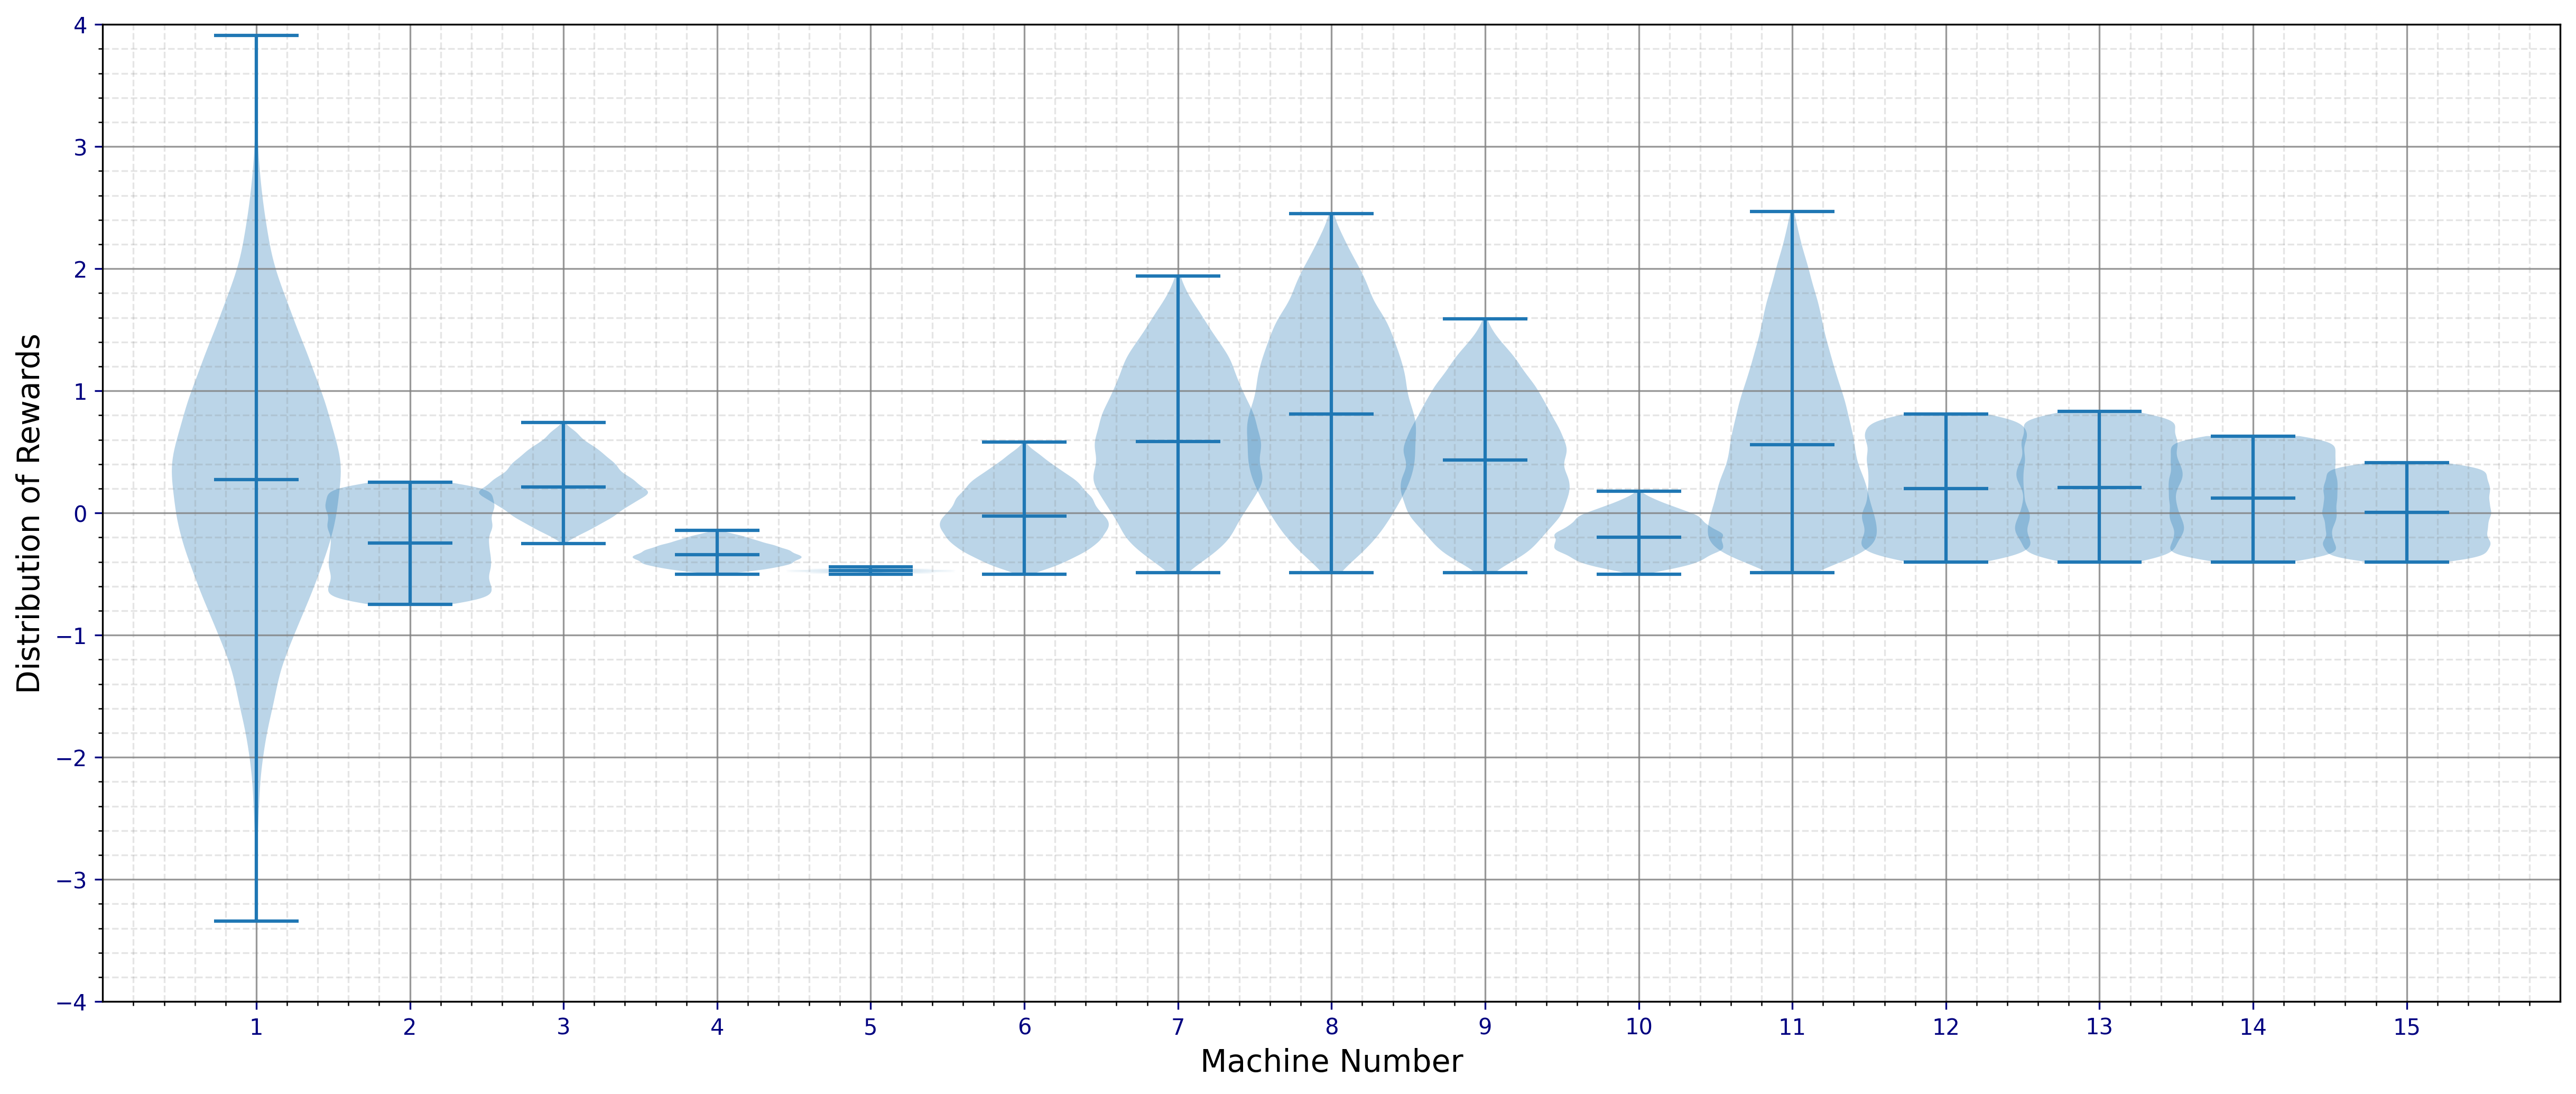

In [9]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20,8),dpi=300)
plt.violinplot(viol_data, violsample, points=200,vert=True, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=False)
plt.xlim(0, 16)
plt.ylim(-4, 4)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both',nbins=16))
plt.xlabel('Machine Number',fontsize=14)
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.ylabel('Distribution of Rewards',fontsize=14)
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.show()

The lucky machine seems to be machine 8. While machine 8 and 10 have the same range, machine 11 is more dense at the bottom end and thinner at the top. Machine 8 has greater probalility at the higher rewards.

## Question 2
 Assume it costs 2 dollars to play each game and you have 200$. Implement the Upper Confidence Bound Algorithm and show that it detects the “lucky” machine.

In [19]:
money = 200
cost = 2
tot_machines = 15
times_played = [0] * tot_machines
rewards = [0] * tot_machines
max_plays = 100
k = 0 #total plays

UCB = [0] * tot_machines
machine_selection = []
c = 2

In [20]:
for i in range(tot_machines):
  rewards[i] = Casino(i + 1)
  money = money + rewards[i] - cost
  k += 1
  times_played[i] += 1
  # we also need to update the UCBs
  UCB[i] = rewards[i] + c*np.sqrt(np.log(k)/times_played[i])
  machine_selection.append(i + 1)

In [21]:
while (money > cost) & (k < max_plays):
  star = np.argmax(UCB) # getting the index of the machine with the highest UCB
  reward = Casino(star + 1)
  # now we track the overall balance
  money = money + reward - cost
  k += 1
  times_played[star] += 1
  # we also need to update the UCBs
  rewards[star] = rewards[star] + reward
  UCB[star] = rewards[star]/times_played[star] + c*np.sqrt(np.log(k)/times_played[star])
  machine_selection.append(star + 1)

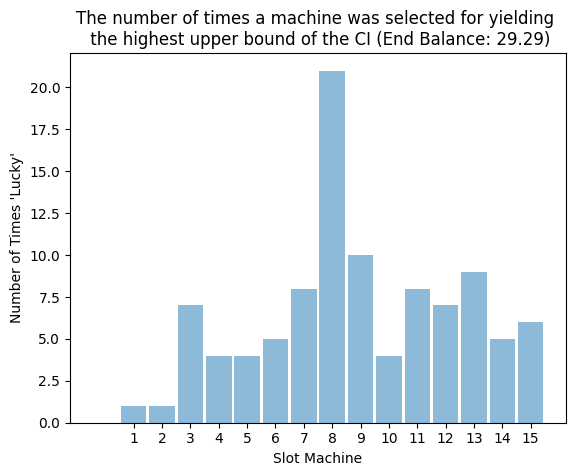

In [22]:
plt.hist(machine_selection, bins=range(17), rwidth=0.9, alpha=0.5,align='left')
plt.title("The number of times a machine was selected for yielding \n the highest upper bound of the CI (End Balance: " + str(round(money,2)) + ")")
plt.xlabel("Slot Machine")
plt.xticks(np.arange(1,16,1))
plt.ylabel("Number of Times 'Lucky'")
plt.show()

## Question 3
 Given the same assumptions as before, implement the epsilon-greedy method with epsilon = 0.2. What do you notice in this case when you apply this method multiple times compared to using the UCB algorithm?

In [23]:
arms = 15
epsilon = .2
mean_reward = [0] * arms
play_count = [0] * arms
max_plays = 400

In [24]:
def EpsilonGreedy(max_plays, epsilon):
  while sum(play_count) <= max_plays:
    value = random.random()
    if value <= epsilon or sum(play_count) == 0:
      machine = random.randint(0,14)
      play_count[machine] += 1
      mean_reward[machine] = mean_reward[machine] + ((1/(play_count[machine]))*(Casino(machine + 1) - mean_reward[machine]))
    else:
      machine = mean_reward.index(max(mean_reward))
      play_count[machine] += 1
      mean_reward[machine] = mean_reward[machine] + ((1/(play_count[machine]))*(Casino(machine + 1) - mean_reward[machine]))
  return mean_reward
  return play_count



In [25]:
EpsilonGreedy(max_plays, epsilon)
play_count, mean_reward

([6, 3, 12, 3, 4, 6, 13, 285, 23, 8, 19, 5, 5, 4, 5],
 [0.41000000000000003,
  -0.17666666666666664,
  0.19999999999999998,
  -0.37333333333333335,
  -0.47500000000000003,
  0.11833333333333335,
  0.5053846153846153,
  0.812701754385965,
  0.37826086956521743,
  -0.14875000000000002,
  0.3368421052631579,
  0.262,
  0.166,
  -0.185,
  0.128])

I notice that while machine 8 typically does have the highest number of plays and the highest average reward, there are many components in the EpsilonGreedy funtion that use random numbers/random variables that create variation in the outputs when looked at multiple times. For example, the first machine picked is random. Ideally, every five or so loops, the arm would choose a random machine over the greedy method, but again, it chooses the value at random and will not always follow the distribution that you normally would expect.

## Question 4
 Consider the grocery store data introduced in class. Apply the "apriori" algorithm to determine what are the association rules between two items if we are looking overall at items that sold at least 200 times.

 Use a min lift of 3, and a min support and confidence of 0.5%. How many rules did you find?

In [26]:
!pip install -q apyori
!pip install -q pandas pyfim==6.28
from apyori import apriori
from fim import eclat
import pandas as pd

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [27]:
products = pd.read_csv('drive/MyDrive/DATA301_Data/products.csv')
orders = pd.read_csv('drive/MyDrive/DATA301_Data/order_products_train.csv')

In [28]:
named_orders = pd.merge(orders,products,on='product_id')
named_orders.sort_values('product_id')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
663284,1641609,1,1,1,Chocolate Sandwich Cookies,61,19
663308,2871337,1,15,0,Chocolate Sandwich Cookies,61,19
663266,908461,1,3,1,Chocolate Sandwich Cookies,61,19
663265,767323,1,5,0,Chocolate Sandwich Cookies,61,19
663264,752651,1,2,1,Chocolate Sandwich Cookies,61,19
...,...,...,...,...,...,...,...
1365951,1092104,49687,1,0,Smartblend Healthy Metabolism Dry Cat Food,41,8
1348756,655800,49688,10,1,Fresh Foaming Cleanser,73,11
1348757,2198380,49688,10,0,Fresh Foaming Cleanser,73,11
1348758,2508423,49688,3,0,Fresh Foaming Cleanser,73,11


In [29]:
counts = named_orders['product_name'].value_counts()
counts = counts[counts > 200]

In [30]:
select = named_orders[named_orders['product_name'].isin(counts.index.values.tolist())]

In [31]:
pd.options.mode.chained_assignment = None
select['cols'] = select.groupby('order_id').cumcount()
selected_pivot = select.pivot(index = 'order_id', columns = 'cols')[['product_name']]

In [32]:
purchases = []
for i in range(0,len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,41)])

In [ ]:
cleaned_list = []
for i in range(len(purchases)):
  cleaned_list.append([x for x in purchases[i] if str(x) != 'nan'])

In [ ]:
rules = apriori(purchases, min_support = .005, min_confidence = 0.005, min_lift = 3, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
rules = 0
for i in range(len(results)):
    result = results[i]
    support   = int(result.support*10000)/100
    confidence   = int(result.ordered_statistics[0].confidence*100)
    hypothesis   = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc   = ''.join([x+' ' for x in result.ordered_statistics[0].items_add if x!='nan'])
    if "nan" not in hypothesis:
        rules = rules + 1
        print("If "+str(hypothesis)+" is purchased, " +str(confidence)+" % of the time " + str(conc)+" is purchased [support - " +str(support)+"%]")
print("Total rules built : " +str(rules))

In [ ]:
for item in results:
    pair = item[0]
    if "nan" not in pair:
        if item[2][0][2] > item[2][1][2]:
          items = [x for x in pair]
          print("Rule: " + items[0] + " => " + items[1])
          print("Support: " + str(round(item[1]*100,2)) + "%")
          print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
          print("Lift: " + str( round(item[2][0][3],2) ))
        else:
          items = [x for x in pair]
          print("Rule: " + items[1] + " => " + items[0])
          print("Support: " + str(round(item[1]*100,2)) + "%")
          print("Confidence: " + str(round( item[2][1][2]*100,2)) + "%")
          print("Lift: " + str( round(item[2][1][3],2) ))

I found 10 rules.